In [1]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud_2020

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that embed documents related to your final project using at least two different specification of `word2vec`, and visualize them each with two separate visualization layout specifications (e.g., TSNE, PCA). Then interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the semantic organization of words in your corpora? Which estimation and visualization specification generate the most insight and appear the most robustly supported and why? 

<span style="color:red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

Continuing with the same dataset as past notebooks, I will be looking at a collection of tweets that went viral during the 2016 election. Within this collection, a few tweets were identified as containing fake news. This notebook will analyze the text of these tweets using Word2vec, as a way to explore the semantic space.

In [2]:
# Preprocessing for word2vec analysis
tweetsDF = pd.read_excel("/home/rkcatipon/Content-Analysis-2020/week-5/electionday_tweets.xlsx")

#load data

tweetsDF['tokenized_sents'] = tweetsDF['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
tweetsDF['normalized_sents'] = tweetsDF['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s, lemma=False) for s in x])

tweetsDF[:100:10]


,is_fake_news,fake_news_category,tweet_id,created_at,retweet_count,text,user_screen_name,user_verified,user_friends_count,user_followers_count,user_favourites_count,tweet_source,geo_coordinates,num_hashtags,num_mentions,num_urls,num_media,tokenized_sents,normalized_sents
0,False,NaN,264033382076407808,Thu Nov 01 15:57:18 +0000 2012,4698,@realDonaldTrump you are full of shit!,RalphGilles,True,763,26680,3079,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0,"[[@realDonaldTrump, you, are, full, of, shit]]","[[@realdonaldtrump, shit]]"
10,False,NaN,388618880605646848,Fri Oct 11 10:55:36 +0000 2013,1629,Beautiful morning walk in Hyde Park #London wi...,billclinton,True,26,6252982,60,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",1,1,2,0,1,"[[Beautiful, morning, walk, in, Hyde, Park, Lo...","[[beautiful, morning, walk, hyde, park, london..."
20,False,NaN,596194588064354304,Thu May 07 06:07:21 +0000 2015,3522,There's an important choice to be made today; ...,SoVeryBritish,True,1,1441390,1468,"<a href=""http://twitter.com/download/iphone"" r...",0,0,1,0,0,"[[There, 's, an, important, choice, to, be, ma...","[[important, choice, today, vote, wisely, favo..."
30,False,NaN,658662473231298560,Mon Oct 26 15:12:25 +0000 2015,16504,Hey @realDonaldTrump you saw a kid lost in New...,DaveWeasel,True,134460,221619,29437,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0,"[[Hey, @realDonaldTrump, you, saw, a, kid, los...","[[hey, @realdonaldtrump, saw, kid, lost, new, ..."
40,False,NaN,674008204838199297,Mon Dec 07 23:30:53 +0000 2015,8749,Finally trashed by @realDonaldTrump. Will stil...,JeffBezos,True,0,146602,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",1,1,2,0,0,"[[Finally, trashed, by, @realDonaldTrump], [Wi...","[[finally, trashed, @realdonaldtrump], [reserv..."
50,False,NaN,687317650658189312,Wed Jan 13 16:57:52 +0000 2016,18193,'To Bernie Sanders with thanks for your commit...,BernieSanders,True,1511,3866551,970,"<a href=""https://about.twitter.com/products/tw...",0,0,2,0,0,"[[To, Bernie, Sanders, with, thanks, for, your...","[[bernie, sanders, thanks, commitment, real, h..."
60,False,NaN,693175853853904898,Fri Jan 29 20:56:16 +0000 2016,4419,"Oh, yeah btw I still have a copy of this tweet...",QU0RN_D0G,False,4854,7664,14830,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,2,0,1,"[[Oh], [yeah], [btw, I, still, have, a, copy, ...","[[oh], [yeah], [btw, copy, tweet, deleted, sir..."
70,False,NaN,704756959019474948,Tue Mar 01 19:55:27 +0000 2016,7867,"@realDonaldTrump, Bless your heart.",nikkihaley,True,176,158430,138,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0,2,0,0,"[[@realDonaldTrump, Bless, your, heart]]","[[@realdonaldtrump, bless, heart]]"
80,False,NaN,712380720656883713,Tue Mar 22 20:49:33 +0000 2016,2744,Retweet if Donald J. Trump has your vote for t...,trump_nation,False,778,28272,676,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0,"[[Retweet, if, Donald, J., Trump, has, your, v...","[[retweet, donald, j., trump, vote, general, e..."
90,False,NaN,722628702748688385,Wed Apr 20 03:31:23 +0000 2016,5363,'@bigop1: @realDonaldTrump @CNN @oreillyfactor...,realDonaldTrump,True,41,13035771,45,"<a href=""http://twitter.com/download/android"" ...",0,0,5,0,1,"[[@bigop1], [@realDonaldTrump, @CNN, @oreillyf...","[[@bigop1], [@realdonaldtrump, @cnn, @oreillyf..."


In [3]:
#The tokenized text is now in lists of lists

,is_fake_news,fake_news_category,tweet_id,created_at,retweet_count,text,user_screen_name,user_verified,user_friends_count,user_followers_count,user_favourites_count,tweet_source,geo_coordinates,num_hashtags,num_mentions,num_urls,num_media,tokenized_sents,normalized_sents
0,False,NaN,264033382076407808,Thu Nov 01 15:57:18 +0000 2012,4698,@realDonaldTrump you are full of shit!,RalphGilles,True,763,26680,3079,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0,"[[@realDonaldTrump, you, are, full, of, shit]]","[[@realdonaldtrump, shit]]"


In [4]:
# train the word2vec model with sentences

tweetsW2V = gensim.models.word2vec.Word2Vec(tweetsDF['normalized_sents'].sum())

In [5]:
# let us inspect the term Trump
tweetsW2V['trump'][:10]

array([ 0.01289606, -0.00041388, -0.01366387, -0.0157923 ,  0.01326016,
        0.01739379, -0.01310362,  0.01145159,  0.00240094, -0.00805926],
      dtype=float32)

In [16]:
# a look at all the vectors
print(tweetsW2V.wv.syn0)
print()
print("A look at the different vectorized words")
print("##########")
print('11:', tweetsW2V.wv.index2word[11])
print('200:', tweetsW2V.wv.index2word[200])
print('90:', tweetsW2V.wv.index2word[90])

[[ 0.0154112   0.00153469 -0.01682547 ... -0.01832273 -0.01056829
  -0.00050319]
 [ 0.00707332  0.00132964 -0.00175251 ... -0.00370144 -0.00423952
  -0.00156042]
 [ 0.00856132  0.00260492 -0.01599956 ... -0.0170201  -0.0106805
  -0.00083043]
 ...
 [ 0.00549344  0.00379087 -0.00075946 ...  0.00032598  0.00145225
   0.00126699]
 [ 0.00262748 -0.00432705 -0.00460185 ... -0.0027735   0.00074744
  -0.00358284]
 [ 0.00108969  0.00414724 -0.00546189 ...  0.00412179  0.00106543
  -0.00088897]]

A look at the different vectorized words
##########
11: president
200: political
90: good


# Cosine similarity
Because of the nature of the dataset, I would like to learn about words that are most similar to the two candidates according to w2v. I hypothesize that the words that are considered similar to the Clinton and Trump may tell us about the characterization of the two candidates the day of the election.

In [18]:
tweetsW2V.most_similar('trump')

[('@realdonaldtrump', 0.9343799948692322),
 ('@hillaryclinton', 0.9262780547142029),
 ('america', 0.9177895784378052),
 ('amp', 0.902174711227417),
 ('vote', 0.894525408744812),
 ('american', 0.8825736045837402),
 ('country', 0.8721880912780762),
 ('big', 0.8711351156234741),
 ('stop', 0.864741861820221),
 ('day', 0.8636565208435059)]

In [42]:
tweetsW2V.most_similar('clinton')

[('@hillaryclinton', 0.8727900981903076),
 ('@realdonaldtrump', 0.8681909441947937),
 ('country', 0.8492379188537598),
 ('america', 0.8481353521347046),
 ('trump', 0.8440330028533936),
 ('people', 0.8304079174995422),
 ('amp', 0.8279247879981995),
 ('american', 0.8269222974777222),
 ('today', 0.8174984455108643),
 ('fight', 0.8165656328201294)]

In [43]:
tweetsW2V.most_similar('@hillaryclinton')

[('@realdonaldtrump', 0.958302915096283),
 ('trump', 0.9262779951095581),
 ('amp', 0.9144220352172852),
 ('vote', 0.9132774472236633),
 ('country', 0.9084826111793518),
 ('american', 0.9036430716514587),
 ('america', 0.9011461138725281),
 ('people', 0.8889366388320923),
 ('polls', 0.8847053050994873),
 ('fight', 0.8837143182754517)]

It makes that in the vector space the two candidate profiles would be close together. Semantically, it also appears they have cosine similar features such as "American" and "country". The two divergent terms are "big" for Trump and "fight" for Clinto which only appear in their respective candidate's cosine similarity set.

In [23]:
tweetsW2V.doesnt_match(['fight', 'clinton', 'today', 'huge', 'country'])

'huge'

Seems like "huge" is not like the others in the wordset. Let us take a look at the semantic equation. In the readings, the go-to example of word2vec is King + woman - man = queen. I'd be curious to see how word2vec handles two political spectrums represented by @hillaryclinton versus @realdonaltrump. Let's talk a look at how @HillaryClinton subtracts "emails" and adds "huge".

# W2V subtraction and addition

In [47]:
tweetsW2V.most_similar(positive=['@hillaryclinton', 'huge'], negative = ['emails'])

[('@realdonaldtrump', 0.5528126955032349),
 ('cast', 0.542144775390625),
 ('time', 0.5393102765083313),
 ('😂', 0.5389424562454224),
 ('people', 0.5258145332336426),
 ('day', 0.5058679580688477),
 ('.@hillaryclinton', 0.5038829445838928),
 ('voter', 0.5028741359710693),
 ('vote', 0.49897879362106323),
 ('going', 0.49754953384399414)]

In this word set, Clinton + huge - emails = @realdonaldtrump. Clinton is to emails and realdonaldtrump is to huge. These were buzzwords associated with both campaigns (for better or for worse). This intuitively makes sense but this does not seem to be a "hard" analysis, but rather is open to interpretation when dealing with such similar texts.

In [48]:
# save
tweetsW2V.save("tweetsW2V")

# Visualization

Visualizing top words and their vectors

In [49]:
# visualize by taking top words
numWords = 50
targetWords = tweetsW2V.wv.index2word[:numWords]

# extract top word vectors.
# create smaller matrix preserves distances from orig. matrix
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(tweetsW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix


#PCA reduction to number of words = number of components
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

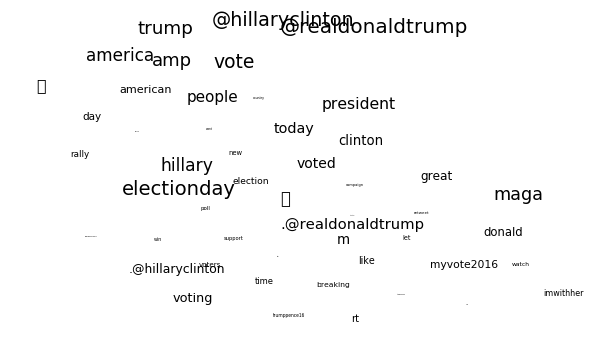

In [50]:
#plot the points

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

Cool! I think the [] are emojis that may not translate in the visualization. We do see that #myvote2016 is close to "#realdonaldtrump", "donald", and "maga". It also seems that Clinton's campaign hashtag #imwithher is close to the hashtag #myvote2016 as well, though it's surprisingly not close to "hillary" and "@hillaryclinton". I would venture a guess at user behavior here: perhaps users were tagging the campaign but were mostly talking about Trump directly. 

# Stretch

<span style="color:red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

In [ ]:
x = tweetsW2V.most_similar(positive=['@hillaryclinton', 'huge'], negative = ['emails'])
y = tweetsW2V.most_similar(positive=['@realdonaldtrump', 'big'], negative = ['huge'])

x = np.asarray(x).reshape(-1,1)
y = np.asarray(y).reshape(-1,1)
x.dot(y)

# I tried running this but multiplication did not work


## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that embed documents related to your final project using `doc2vec`, and explore the relationship between different documents and the word vectors you analyzed in the last exercise. Consider the most similar words to critical documents, analogies (doc _x_ + word _y_), and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the documentary organization of your semantic space?

XX Instead of just looking at just how words embed within in the space, we can look at how the different documents relate to each other within the space. First lets load our data--abstracts of most U.S. physics papers from the 1950s.

# Doc2Vec

In [96]:
# we weren't given a criteria on how to choose keywords for taggins, so I'm picking ones that might make sense
keywords = ['democrat', 'republican', 'imwithher', 'myvote2016', 'election', 'fake', 'news' ]

In [97]:
# preprocessing
# looks like we're tokenizing words again
tweetsDF['tokenized_words'] = tweetsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
tweetsDF['normalized_words'] = tweetsDF['tokenized_words'].apply(lambda x: lucem_illud_2020.normalizeTokens(x, lemma=False))

In [98]:
#tagging docs
taggedDocs = []
for index, row in tweetsDF.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['tweet_id']) #unique tweetid
    docKeywords.append(row['is_fake_news']) # fake news classification
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'], tags = docKeywords))
tweetsDF['TaggedTweets'] = taggedDocs

In [101]:
tweetsDF_small = tweetsDF[:50]

In [105]:
tweetsD2V = gensim.models.doc2vec.Doc2Vec(tweetsDF_small['TaggedTweets']) #Limiting to 100 dimensions


ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

In [84]:
# inspect vectors
tweetsD2V.docvecs[1952]

NameError: name 'tweetsD2V' is not defined

In [ ]:
# inspect a word
tweetsD2V['election']

In [ ]:
# inspect a word
tweetsD2V.most_similar(positive = ['atom','electrons'], negative = ['electron'], topn = 1)

In [ ]:
# compute all of these by hand--explicitly wth vector algebra:
sklearn.metrics.pairwise.cosine_similarity(apsD2V['electron'].reshape(1,-1), apsD2V['positron'].reshape(1,-1))


In [ ]:
# calculate distance between a word and documents in the dataset
apsD2V.docvecs.most_similar([ apsD2V['imwithher'] ], topn=5 )

In [ ]:
#inspect the most similar tweet/document


In [ ]:
# words most similar to the document
apsD2V.most_similar( [ apsD2V.docvecs['10.1103/PhysRev.98.875'] ], topn=5) 


## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that embed documents related to your final project, then generate meaningful semantic dimensions based on your theoretical understanding of the semantic space (i.e., by subtracting semantically opposite word vectors) and project another set of word vectors onto those dimensions. Interpret the meaning of these projections for your analysis. Which of the dimensions you analyze explain the most variation in the projection of your words and why? 

<span style="color:red">***Stretch***: Average together multiple antonym pairs to create robust semantic dimensions. How do word projections on these robust dimensions differ from single-pair dimensions?

## <span style="color:red">*Exercise 4b*</span>

<span style="color:red">**Do only 4a or 4b.** Construct cells immediately below this that align word embeddings over time or across domains/corpora. Interrogate the spaces that result and ask which words changed most and least over the entire period or between contexts/corpora. What does this reveal about the social game underlying your space? 